In [1]:
import torch
from ultralytics import YOLO

# Load YOLOv8s model
model = YOLO('yolov8s.pt')  # Load an official model
# model = YOLO('./weights/best.pt')  # Load a custom model

# Image URL
image_url = 'https://ultralytics.com/images/zidane.jpg'

In [2]:
import urllib
from PIL import Image
import io
import numpy as np
import cv2

def url_to_tensor(url):
    response = urllib.request.urlopen(url)
    image_data = response.read()
    image = Image.open(io.BytesIO(image_data))

    # Convert image to tensor
    image = torch.from_numpy(np.array(image))
    image = image.float()
    image = image.permute(2, 0, 1)
    return image

image_tensor = url_to_tensor(image_url)
print(image_tensor)

tensor([[[72., 74., 73.,  ..., 56., 55., 51.],
         [71., 71., 70.,  ..., 55., 52., 47.],
         [75., 73., 70.,  ..., 56., 52., 48.],
         ...,
         [40., 41., 40.,  ..., 35., 35., 36.],
         [39., 39., 39.,  ..., 35., 35., 36.],
         [38., 38., 38.,  ..., 35., 35., 36.]],

        [[48., 50., 51.,  ..., 21., 19., 15.],
         [47., 47., 48.,  ..., 20., 16., 11.],
         [51., 49., 48.,  ..., 20., 16., 12.],
         ...,
         [43., 44., 43.,  ..., 49., 49., 50.],
         [42., 42., 42.,  ..., 49., 49., 50.],
         [41., 41., 41.,  ..., 49., 49., 50.]],

        [[38., 40., 40.,  ..., 25., 21., 17.],
         [37., 37., 37.,  ..., 24., 18., 13.],
         [41., 39., 37.,  ..., 24., 20., 16.],
         ...,
         [48., 49., 48.,  ..., 49., 49., 50.],
         [49., 49., 49.,  ..., 50., 50., 51.],
         [48., 48., 48.,  ..., 50., 50., 51.]]])


In [3]:
image = image_tensor.permute(1, 2, 0).cpu().numpy()
image = image * 255.0
image = image.astype(np.uint8)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Inference
results = model(image)

Ultralytics YOLOv8.0.43  Python-3.11.5 torch-2.1.1+cpu CPU
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

0: 384x640 2 persons, 1 tie, 295.3ms
Speed: 1.0ms preprocess, 295.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


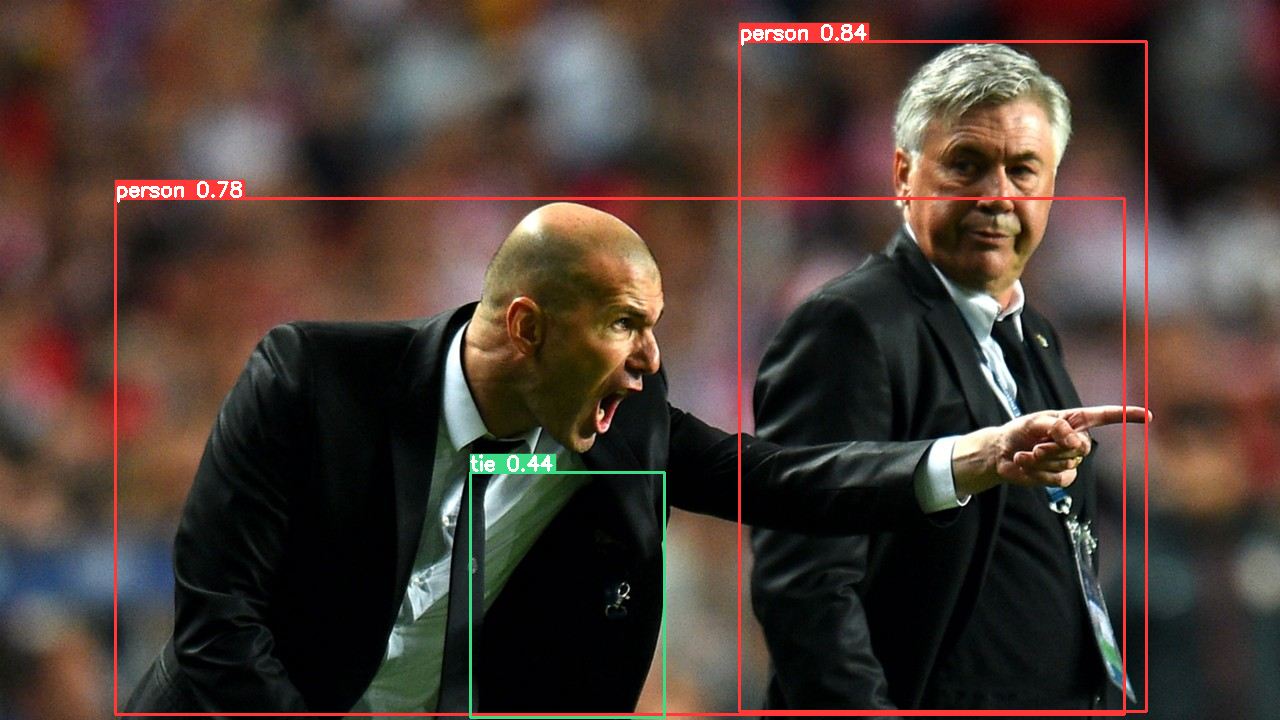

In [5]:
from ultralyticsplus import render_result
render_result(model=model, image=image_url, result=results[0])
